<a href="https://colab.research.google.com/github/manu14357/Similar-Image-Finder/blob/main/Similar_Image_Finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn tensorflow keras opencv-python matplotlib

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
train_path = '/content/drive/MyDrive/archive/dataset/training_set/'
test_path = '/content/drive/MyDrive/archive/dataset/test_set/'

categories = sorted(os.listdir(train_path))

print(f"Found {len(categories)} categories: {categories}")

Found 10 categories: ['beaches', 'bus', 'dinosaurs', 'elephants', 'flowers', 'foods', 'horses', 'monuments', 'mountains_and_snow', 'peolpe_and_villages_in_Africa']


In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    """
    Extracts a color histogram from the image.

    Parameters:
        image (numpy.ndarray): The input image.
        bins (tuple): Number of bins for each color channel.

    Returns:
        numpy.ndarray: Flattened and normalized histogram.
    """

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
                        [0, 180, 0, 256, 0, 256])

    cv2.normalize(hist, hist)

    return hist.flatten()

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def extract_cnn_features(image, model):
    """
    Extracts CNN-based features from the image using a pre-trained model.

    Parameters:
        image (numpy.ndarray): The input image.
        model (tensorflow.keras.models.Model): The pre-trained CNN model.

    Returns:
        numpy.ndarray: Flattened CNN features.
    """

    image = cv2.resize(image, (224, 224))

    image = image.astype('float32')

    image /= 255.0

    image = np.expand_dims(image, axis=0)

    features = model.predict(image)

    return features.flatten()

In [ ]:
color_features_train = []
color_features_test = []
cnn_features_train = []
cnn_features_test = []
labels_train = []
labels_test = []

In [ ]:
le = LabelEncoder()

le.fit(categories)

LabelEncoder()

In [ ]:
def process_images(path, color_feat, cnn_feat, labels):
    """
    Processes images in the given directory to extract features and labels.

    Parameters:
        path (str): Path to the dataset directory (train or test).
        color_feat (list): List to store color histogram features.
        cnn_feat (list): List to store CNN features.
        labels (list): List to store labels.

    Returns:
        None
    """
    for category in categories:
        category_path = os.path.join(path, category)
        if not os.path.isdir(category_path):
            print(f"Skipping {category_path}, not a directory.")
            continue
        image_files = os.listdir(category_path)
        for image_name in image_files:
            image_path = os.path.join(category_path, image_name)

            image = cv2.imread(image_path)
            if image is None:
                print(f"Warning: Unable to read {image_path}. Skipping.")
                continue

            color_hist = extract_color_histogram(image)
            color_feat.append(color_hist)

            cnn_feat_extracted = extract_cnn_features(image, model)
            cnn_feat.append(cnn_feat_extracted)

            labels.append(category)

In [ ]:
print("Processing training images...")
process_images(train_path, color_features_train, cnn_features_train, labels_train)

print("Processing testing images...")
process_images(test_path, color_features_test, cnn_features_test, labels_test)

Processing training images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 973ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/

In [ ]:
labels_train_enc = le.transform(labels_train)
labels_test_enc = le.transform(labels_test)

In [ ]:
print("Training SVM with Color Histogram Features...")
svm_color = SVC(kernel='linear', probability=True)
svm_color.fit(color_features_train, labels_train_enc)

y_pred_svm_color = svm_color.predict(color_features_test)

accuracy_svm_color = accuracy_score(labels_test_enc, y_pred_svm_color)
print(f"SVM Color Histogram Accuracy: {accuracy_svm_color * 100:.2f}%")

Training SVM with Color Histogram Features...
SVM Color Histogram Accuracy: 86.00%


In [ ]:
print("Training KNN with Color Histogram Features...")
knn_color = KNeighborsClassifier(n_neighbors=5)
knn_color.fit(color_features_train, labels_train_enc)

y_pred_knn_color = knn_color.predict(color_features_test)

accuracy_knn_color = accuracy_score(labels_test_enc, y_pred_knn_color)
print(f"KNN Color Histogram Accuracy: {accuracy_knn_color * 100:.2f}%")

Training KNN with Color Histogram Features...
KNN Color Histogram Accuracy: 73.00%


In [ ]:
X_train_cnn = np.array(cnn_features_train)
X_test_cnn = np.array(cnn_features_test)


cnn_model = models.Sequential([
    layers.Dense(512, activation='relu', input_dim=X_train_cnn.shape[1]),
    layers.Dropout(0.5),
    layers.Dense(len(categories), activation='softmax')
])


cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print("Training CNN with CNN Features...")
history = cnn_model.fit(X_train_cnn, labels_train_enc,
                        epochs=20,
                        batch_size=32,
                        validation_data=(X_test_cnn, labels_test_enc))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training CNN with CNN Features...
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 320ms/step - accuracy: 0.4068 - loss: 3.5617 - val_accuracy: 0.8300 - val_loss: 0.6547
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 237ms/step - accuracy: 0.8290 - loss: 0.4668 - val_accuracy: 0.8700 - val_loss: 0.4762
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 236ms/step - accuracy: 0.9289 - loss: 0.2290 - val_accuracy: 0.9100 - val_loss: 0.4917
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 286ms/step - accuracy: 0.9431 - loss: 0.1621 - val_accuracy: 0.9000 - val_loss: 0.4227
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 306ms/step - accuracy: 0.9776 - loss: 0.0831 - val_accuracy: 0.9100 - val_loss: 0.4279
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step - accuracy: 0.9883 - loss: 0.0574 - val_accuracy: 0.9000 - val_loss: 0.3942
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 278ms/step - accuracy: 0.9796 - loss: 0.0662 - val_accuracy: 0.9100 - val_loss: 0.3655
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 316ms/step - accuracy: 

In [ ]:
loss, accuracy_cnn = cnn_model.evaluate(X_test_cnn, labels_test_enc)
print(f"CNN Features Accuracy: {accuracy_cnn * 100:.2f}%")

y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

print("CNN Classification Report:")
print(classification_report(labels_test_enc, y_pred_cnn_classes, target_names=categories))

conf_matrix = confusion_matrix(labels_test_enc, y_pred_cnn_classes)
print("CNN Confusion Matrix:")
print(conf_matrix)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9005 - loss: 0.6310
CNN Features Accuracy: 91.00%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
CNN Classification Report:
                               precision    recall  f1-score   support

                      beaches       0.86      0.60      0.71        10
                          bus       1.00      1.00      1.00        10
                    dinosaurs       1.00      1.00      1.00        10
                    elephants       1.00      0.90      0.95        10
                      flowers       1.00      1.00      1.00        10
                        foods       0.80      0.80      0.80        10
                       horses       1.00      1.00      1.00        10
                    monuments       0.75      0.90      0.82        10
           mountains_and_snow       0.83      1.00      0.91        10
peolpe_and_villages_in_Africa       0.90      0.90      0.90        10

                     accuracy                     

In [ ]:
def retrieve_images(query_image_path, feature_type='cnn', top_k=5):
    """
    Retrieves and displays the top K similar images based on the query image.

    Parameters:
        query_image_path (str): Path to the query image.
        feature_type (str): Type of features to use ('cnn' or 'color').
        top_k (int): Number of similar images to retrieve.

    Returns:
        None
    """

    query_image = cv2.imread(query_image_path)
    if query_image is None:
        print("Error: Unable to read the query image.")
        return

    if feature_type == 'cnn':
        query_features = extract_cnn_features(query_image, model).reshape(1, -1)
        predicted_class_enc = svm_color.predict(query_features)
        predicted_class = le.inverse_transform(predicted_class_enc)[0]
    elif feature_type == 'color':
        query_features = extract_color_histogram(query_image).reshape(1, -1)
        predicted_class_enc = svm_color.predict(query_features)
        predicted_class = le.inverse_transform(predicted_class_enc)[0]
    else:
        print("Error: Invalid feature type specified. Use 'cnn' or 'color'.")
        return

    print(f"Predicted Class: {predicted_class}")

    class_path = os.path.join(test_path, predicted_class)

    if not os.path.isdir(class_path):
        print(f"Error: The class directory {class_path} does not exist.")
        return

    retrieved_images = []

    image_files = os.listdir(class_path)
    for img_name in image_files[:top_k]:
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Unable to read {img_path}. Skipping.")
            continue
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        retrieved_images.append(img_rgb)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, top_k + 1, 1)
    query_img_rgb = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)
    plt.imshow(query_img_rgb)
    plt.title("Query Image")
    plt.axis('off')

    for i, img in enumerate(retrieved_images):
        plt.subplot(1, top_k + 1, i + 2)
        plt.imshow(img)
        plt.title(f"Retrieved {i+1}")
        plt.axis('off')

    plt.show()

In [ ]:
def retrieve_images(query_image_path, feature_type='cnn', top_k=5):
    """
    Retrieves and displays the top K similar images based on the query image.

    Parameters:
        query_image_path (str): Path to the query image.
        feature_type (str): Type of features to use ('cnn' or 'color').
        top_k (int): Number of similar images to retrieve.

    Returns:
        None
    """

    query_image = cv2.imread(query_image_path)
    if query_image is None:
        print("Error: Unable to read the query image.")
        return

    if feature_type == 'cnn':
        query_features = extract_cnn_features(query_image, model).reshape(1, -1)

        svm_cnn = SVC(kernel='linear', probability=True)
        X_train_cnn_svm = np.array(cnn_features_train)
        svm_cnn.fit(X_train_cnn_svm, labels_train_enc)

        predicted_class_enc = svm_cnn.predict(query_features)
        predicted_class = le.inverse_transform(predicted_class_enc)[0]
    elif feature_type == 'color':
        query_features = extract_color_histogram(query_image).reshape(1, -1)

        predicted_class_enc = svm_color.predict(query_features)
        predicted_class = le.inverse_transform(predicted_class_enc)[0]
    else:
        print("Error: Invalid feature type specified. Use 'cnn' or 'color'.")
        return

    print(f"Predicted Class: {predicted_class}")

    class_path = os.path.join(test_path, predicted_class)

    if not os.path.isdir(class_path):
        print(f"Error: The class directory {class_path} does not exist.")
        return

    retrieved_images = []

    image_files = os.listdir(class_path)
    for img_name in image_files[:top_k]:
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Unable to read {img_path}. Skipping.")
            continue
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        retrieved_images.append(img_rgb)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, top_k + 1, 1)
    query_img_rgb = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)
    plt.imshow(query_img_rgb)
    plt.title("Query Image")
    plt.axis('off')

    for i, img in enumerate(retrieved_images):
        plt.subplot(1, top_k + 1, i + 2)
        plt.imshow(img)
        plt.title(f"Retrieved {i+1}")
        plt.axis('off')

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
Predicted Class: flowers


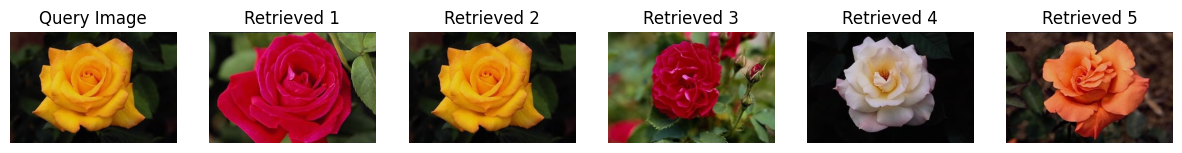

Predicted Class: flowers


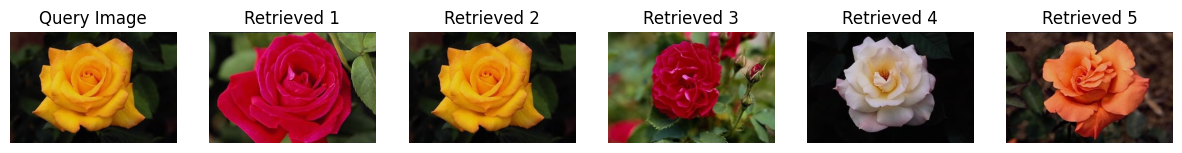

In [ ]:
query_image = '/content/drive/MyDrive/archive/dataset/test_set/flowers/600.jpg'
retrieve_images(query_image, feature_type='cnn', top_k=5)
retrieve_images(query_image, feature_type='color', top_k=5)

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = '/content/drive/MyDrive/archive/dataset/training_set/'
test_path = '/content/drive/MyDrive/archive/dataset/test_set/'
categories = sorted(os.listdir(train_path))

# Load training images and labels
training_images = []
training_labels = []

for class_name in categories:
    class_dir = os.path.join(train_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Unable to read {image_path}. Skipping.")
            continue
        image = cv2.resize(image, (224, 224))
        training_images.append(image)
        training_labels.append(class_name)

# Load testing images and labels
testing_images = []
testing_labels = []

for class_name in categories:
    class_dir = os.path.join(test_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Unable to read {image_path}. Skipping.")
            continue
        image = cv2.resize(image, (224, 224))
        testing_images.append(image)
        testing_labels.append(class_name)

training_images = np.array(training_images)
testing_images = np.array(testing_images)

le = LabelEncoder()
le.fit(categories)
training_labels_enc = le.transform(training_labels)
testing_labels_enc = le.transform(testing_labels)


print(f"Total training images loaded: {len(training_images)}")
print(f"Total test images loaded: {len(testing_images)}")

base_model_resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model_resnet = Model(inputs=base_model_resnet.input, outputs=base_model_resnet.output)

for layer in base_model_resnet.layers:
    layer.trainable = False


fine_tune_model = models.Sequential([
    base_model_resnet,
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(categories), activation='softmax')
])

fine_tune_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

print("Fine-tuning ResNet50 model...")


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

datagen.fit(training_images)

history_fine = fine_tune_model.fit(
    datagen.flow(training_images, training_labels_enc, batch_size=32),
    steps_per_epoch=len(training_images) // 32,
    epochs=10,
    validation_data=(testing_images, testing_labels_enc)
)

for layer in base_model_resnet.layers[-10:]:
    layer.trainable = True

fine_tune_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

history_fine = fine_tune_model.fit(
    datagen.flow(training_images, training_labels_enc, batch_size=32),
    steps_per_epoch=len(training_images) // 32,
    epochs=10,
    validation_data=(testing_images, testing_labels_enc)
)

Total training images loaded: 900
Total test images loaded: 100
Fine-tuning ResNet50 model...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 225s 7s/step - accuracy: 0.5532 - loss: 1.4494 - val_accuracy: 0.9200 - val_loss: 0.2271
Epoch 2/10
 1/28 ━━━━━━━━━━━━━━━━━━━━ 2:54 6s/step - accuracy: 0.8750 - loss: 0.3009

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


28/28 ━━━━━━━━━━━━━━━━━━━━ 25s 688ms/step - accuracy: 0.8750 - loss: 0.3009 - val_accuracy: 0.9200 - val_loss: 0.2271
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 196s 7s/step - accuracy: 0.9398 - loss: 0.2196 - val_accuracy: 0.9500 - val_loss: 0.1716
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 26s 759ms/step - accuracy: 0.9688 - loss: 0.1217 - val_accuracy: 0.9500 - val_loss: 0.1645
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 239s 7s/step - accuracy: 0.9570 - loss: 0.1184 - val_accuracy: 0.9600 - val_loss: 0.1259
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 26s 760ms/step - accuracy: 0.9375 - loss: 0.1562 - val_accuracy: 0.9600 - val_loss: 0.1293
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 235s 7s/step - accuracy: 0.9717 - loss: 0.1002 - val_accuracy: 0.9700 - val_loss: 0.1258
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 683ms/step - accuracy: 0.9062 - loss: 0.1694 - val_accuracy: 0.9700 - val_loss: 0.1257
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 197s 7s/step - accuracy: 0.9843 - loss: 0.0653 - val_accuracy: 0.9500 - val_

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

datagen.fit(X_train_cnn.reshape(-1, 224, 224, 3))

history_aug = fine_tune_model.fit(
    datagen.flow(X_train_cnn.reshape(-1, 224, 224, 3), labels_train_enc, batch_size=32),
    steps_per_epoch=len(X_train_cnn) // 32,
    epochs=10,
    validation_data=(X_test_cnn, labels_test_enc)
)

In [ ]:
!pip install faiss-cpu

import faiss

combined_features_train = np.hstack((color_features_train, resnet_features_train))
combined_features_test = np.hstack((color_features_test, resnet_features_test))

faiss.normalize_L2(combined_features_train)
faiss.normalize_L2(combined_features_test)

dimension = combined_features_train.shape[1]
index = faiss.IndexFlatL2(dimension)


index.add(combined_features_train)

def retrieve_faiss(query_image_path, top_k=5):
    """
    Retrieves and displays the top K similar images using FAISS.

    Parameters:
        query_image_path (str): Path to the query image.
        top_k (int): Number of similar images to retrieve.

    Returns:
        None
    """

    query_image = cv2.imread(query_image_path)
    if query_image is None:
        print("Error: Unable to read the query image.")
        return


    query_color = extract_color_histogram(query_image)
    query_resnet = extract_resnet_features(query_image, model_resnet)


    query_features = np.hstack((query_color, query_resnet)).astype('float32').reshape(1, -1)


    faiss.normalize_L2(query_features)


    distances, indices = index.search(query_features, top_k)


    retrieved_images = []
    for idx in indices[0]:
        img_path = training_image_paths[idx]
        img = cv2.imread(img_path)
        if img is None:
            continue
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        retrieved_images.append(img_rgb)


    plt.figure(figsize=(15, 5))


    plt.subplot(1, top_k + 1, 1)
    query_img_rgb = cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB)
    plt.imshow(query_img_rgb)
    plt.title("Query Image")
    plt.axis('off')

    for i, img in enumerate(retrieved_images):
        plt.subplot(1, top_k + 1, i + 2)
        plt.imshow(img)
        plt.title(f"Retrieved {i+1}")
        plt.axis('off')

    plt.show()

query_image = '/content/drive/MyDrive/archive/dataset/test/class1/image123.jpg'
retrieve_faiss(query_image, top_k=5)

In [ ]:
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

def create_base_network(model_resnet):
    input = Input(shape=(224, 224, 3))
    features = model_resnet(input)
    return Model(inputs=input, outputs=features)

base_network = create_base_network(model_resnet)


input_a = Input(shape=(224, 224, 3))
input_b = Input(shape=(224, 224, 3))


processed_a = base_network(input_a)
processed_b = base_network(input_b)


distance = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))([processed_a, processed_b])


outputs = layers.Dense(1, activation='sigmoid')(distance)


siamese_model = Model(inputs=[input_a, input_b], outputs=outputs)


siamese_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


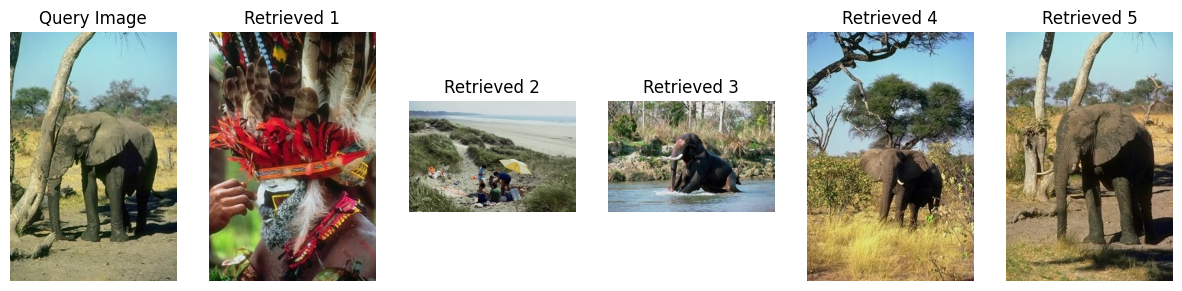